# CHAPTER 2. 자연어와 단어의 분산 표현

## 2.1 자연어 처리란
- 자연어(Natural Language)
- 자연어 처리(Natural Language Processing, NLP)

### 2.1.1 단어의 의미
- 문자
- 단어
- 자연어를 컴퓨터에게 이해시키기 위해 '단어의 의미'를 이해 시키는 것이 중요하다.
  - 시소러스를 활용한 기법: 단어의 의미를 사람이 정의하는 기법
  - 통계 기반 기법
  - 추론 기반 기법(word2vec)

## 2.2 시소러스
- 시소러스: 유의어 사전, 뜻이 같은 단어(동의어)나 뜻이 비슷한 단어(유의어)가 한 그룹으로 분류되어 있음
  - 단어 사이의 '상위와 하위' 혹은 '전체와 부분' 등 세세한 관계까지 정의해 둔 경우가 있음.
  - 각 단어의 관계를 그래프 구조로 정의

### 2.2.1 WordNet
- 자연어 처리 분야에서 가장 유명한 시소러스
- 유의어를 얻거나 '단어 네트워크'를 이용할 수 있다.
  - 수많은 단어에 대해 동의어와 계층 구조 등의 관계가 정의되어 있다.
- 단어 네트워크를 사용해 단어 사이의 유사도를 구할 수 있다.

### 2.2.2 시소러스의 문제점

- 시대 변화에 대응하기 어렵다.
  - 신조어
  - 시대에 따라 언어의 의미가 변한다.
- 사람을 쓰는 비용이 크다.
  - 현존하는 영어 단어의 수는 1,000만개가 넘는데 이 방대한 단어들 모두에 대해 단어 사이의 관계를 정의하려면 엄청난 인적 비용이 발생한다.
  - WordNet에 등록되어 있는 단어: 20만개 이상
- 단어의 미묘한 차이를 표현할 수 없다.

## 2.3 통계 기반 기법

- 말뭉치(Corpus)
  - 대량의 텍스트 데이터
  - 맹목적으로 수집된 텍스트 데이터가 아닌 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 텍스트 데이터

### 2.3.1 파이썬으로 말뭉치 전처리하기

In [3]:
text = "You say goodbye and I say hello."

text = text.lower()
text = text.replace(".", " .")
print(text)

# 단어 단위로 분리
words1 = text.split(" ")
print(words1)

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [4]:
# 정규표현식
import re

text = "You say goodbye and I say hello."

text = text.lower()
words2 = re.split("\W+?", text)
print(words2)

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '']


In [5]:
word_to_id = {}
id_to_word = {}

for word in words1:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(word_to_id)
print(id_to_word)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [6]:
print(word_to_id["hello"])
print(id_to_word[1])

5
say


In [7]:
import numpy as np

corpus = [word_to_id[w] for w in words1]  # 리스트 컴프리핸션(내포)
print(corpus)

corpus = np.array(corpus)
print(corpus)

[0, 1, 2, 3, 4, 1, 5, 6]
[0 1 2 3 4 1 5 6]


In [8]:
def preprocess(text):
    text = text.lower()
    text = text.replace(".", " .")

    words = text.split(" ")

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [9]:
text = "You say goodbye and I say hello."
print(preprocess(text))

(array([0, 1, 2, 3, 4, 1, 5, 6]), {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}, {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})


### 2.3.2 단어의 분산 표현
- 단어를 벡터로 표현
- 단어의 분산 표현은 단어를 고정 길이의 밀집 벡터(Dense Vector)로 표현한다.
  - 밀집 벡터: 대부분의 원소가 0이 아닌 실수인 벡터

### 2.3.3 분포 가설(Distributinal Hypothesis)
- '단어의 의미는 주변 단어에 의해 형성된다.'
  - 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(Context)이 의미를 형성한다.
  - 예) "I drink beer", "We drink wine"처럼 "drink" 주변에는 음료가 등장하기 쉽다.
- 윈도우 크기(Window Size)
  - 맥락: 특정 단어를 중심에 둔 그 주변 단어를 뜻함
  - 윈도우 크기: 맥락의 크기(주변 단어를 몇 개나 포함할지)
    - 예) 윈도우 크기가 1이면 좌우 한 단어씩, 윈도우 크기가 2이면 좌우 두 단어씩 맥락에 포함된다.

### 2.3.4 동시발생 행렬
- 모든 단어에 대해 동시발생하는 단어를 정리한 것(벡터, 행렬)
- 예) 문장 "You say goodbye and I say hello." (단어 수: 총 7개), 윈도우 크기 1

In [10]:
import sys

sys.path.append("..")
import numpy as np

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [11]:
# 동시발생 행렬
# - 단어의 의미적 관계 반영: 발생빈도를 통해
C = np.array(
    [
        # you, say, goodbye, and, i, hello, .
        [0, 1, 0, 0, 0, 0, 0],  # you
        [1, 0, 1, 0, 1, 1, 0],  # say
        [0, 1, 0, 1, 0, 0, 0],  # goodbye
        [0, 0, 1, 0, 1, 0, 0],  # and
        [0, 1, 0, 1, 0, 0, 0],  # i
        [0, 1, 0, 0, 0, 0, 1],  # hello
        [0, 0, 0, 0, 0, 1, 0],  # .
    ],
    dtype=np.int32,
)

In [12]:
print(C[0])  # ID가 0인 단어의 벡터 표현
print(C[1])  # ID가 1인 단어의 벡터 표현
print(C[word_to_id["goodbye"]])  # 단어 "goodbye"의 벡터 표현

[0 1 0 0 0 0 0]
[1 0 1 0 1 1 0]
[0 1 0 1 0 0 0]


In [13]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

### 2.3.5 벡터 간 유사도
- 코사인 유사도
  - 분자: 벡터의 내적, 분모: 각 벡터의 L2 노름(벡터의 크기)
  - 각 벡터를 정규화(단위 벡터화)하고 내적을 구하는 것
    - 단위 벡터: 크기가 1인 벡터
  - → '두 벡터가 가리키는 방향이 얼마나 비슷한가'
    - 값의 범위: -1 ~ 1
      - 1: 두 벡터가 같은 방향일 때
      - 0: 두 벡터가 직교일 때
      - -1: 두 벡터가 반대 방향일 때
  - 코사인 유사도는 벡터를 정규화하여 계산되므로, 각 벡터의 크기는 무시하고 벡터의 방향에 초점을 맞춘다.
$$
\begin{align*}
similarity(\mathbf x,  \mathbf y)&=\frac{\mathbf x \cdot \mathbf y}{\lVert \mathbf x \rVert \lVert \mathbf y \rVert}
\\&=\frac{x_1y_1+\cdots+x_ny_n}{\sqrt{x_1^2+\cdots+x_n^2}\sqrt{y_1^2+\cdots+y_n^2}}
\\&=\frac{\mathbf x}{\lVert \mathbf x \rVert}\cdot \frac{\mathbf y}{\lVert \mathbf y \rVert}
\end{align*}
$$

> 행벡터의 의미와 벡터의 내적 (by. 공돌이의 수학정리노트)
- 벡터의 내적은 기하학적으로 한 벡터에서 다른 벡터로의 정사영이다.
- 임의의 두 벡터 $\vec{v_1}$과 $\vec{v_2}$에 대하여 두 벡터의 사잇각이 $\theta$라면 벡터의 내적은 다음과 같이 계산된다.
$$
\vec{v_1}\cdot\vec{v_2}=\lVert\vec{v_1}\rVert\lVert\vec{v_2}\rVert cos\theta
$$

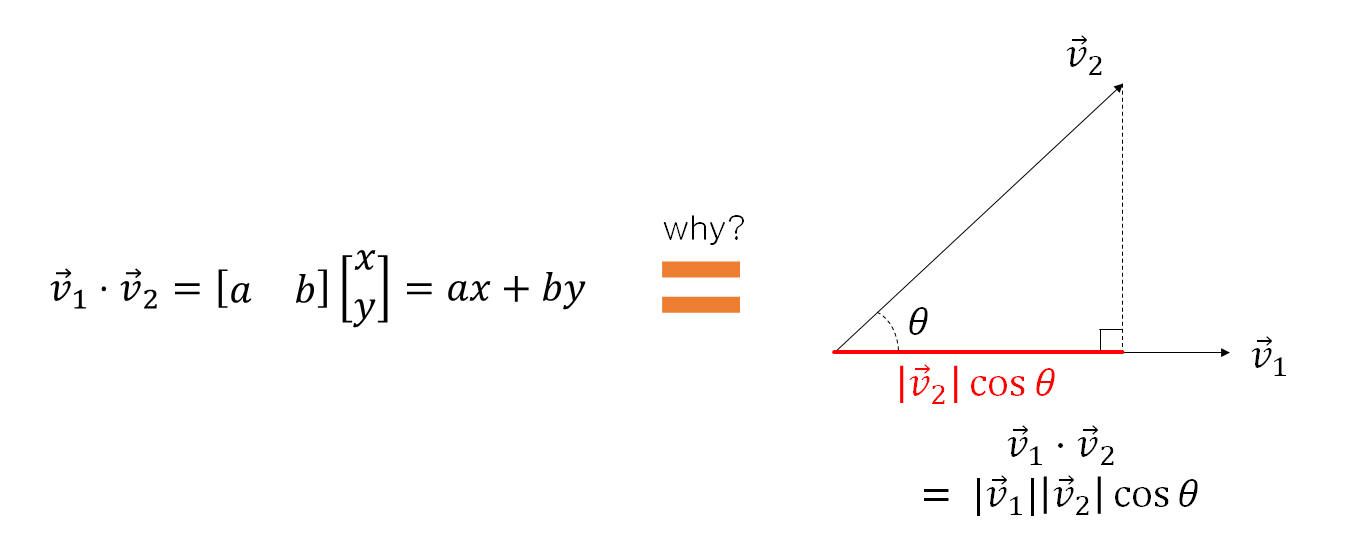

$$
cos\theta=\frac{\vec{v_1}\cdot\vec{v_2}}{\lVert\vec{v_1}\rVert\lVert\vec{v_2}\rVert}
$$

In [14]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2))  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2))  # y의 정규화
    return np.dot(nx, ny)


def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2) + eps)  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps)  # y의 정규화
    return np.dot(nx, ny)

In [15]:
import sys

sys.path.append("..")

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id["you"]]  # "you"의 단어 벡터
c1 = C[word_to_id["i"]]  # "i"의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067758832467


### 2.3.6 유사 단어의 랭킹 표시

In [20]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 검색어를 꺼낸다.
    # - 검색어의 단어 벡터를 꺼낸다.
    if query not in word_to_id:
        print("%s(을)를 찾을 수 없습니다." % query)
        return

    print("\n[query] " + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 2. 코사인 유사도 계산
    # - 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구한다.
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    # - 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다.
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(" %s: %s" % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [18]:
# argsort() 메서드는 넘파이 배열의 원소를 오름차순으로 정렬. (반환값은 배열의 인덱스)
x = np.array([100, -20, 2])
print(x.argsort())
print((-x).argsort())

[1 2 0]
[0 2 1]


In [19]:
import sys

sys.path.append("..")

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar("you", word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


## 2.4 통계 기반 기법 개선하기

### 2.4.1 상호정보량
- 점별 상호정보량(Pointwise Mutual Information, PMI)